## Market Analysis of Different Sectors during the Covid-19 Pandemic

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
start_date = "2020-03-01"
end_date = "2021-12-31"

In [19]:
sectors = {
    "Technology": ["AAPL", "MSFT", "GOOGL"],
    "Healthcare": ["JNJ", "PFE", "MRK"],
    "Energy": ["XOM", "CVX", "BP"],
    "Consumer": ["WMT", "PG", "KO"],
    "Finance": ["JPM", "BAC", "WFC"]
}

In [20]:
def fetch_sector_data(sector, tickers):
    """
    Fetch historical data for given tickers
    """
    data = {}
    for ticker in tickers:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                data[ticker] = hist['Close']
    return pd.DataFrame(data)

In [13]:
def analyze_sector_performance(sector_data, sector_name):
    """
    Analyze and plot sector performance
    """
    # Calculate daily returns
    returns = sector_data.pct_change()
    
    # Calculate cumulative returns
    cumulative_returns = (1 + returns).cumprod() - 1
    
    # Basic statistics
    stats = {
        'Mean Return': returns.mean() * 252,  # Annualized
        'Volatility': returns.std() * (252 ** 0.5),  # Annualized
        'Max Drawdown': (sector_data / sector_data.cummax() - 1).min()
    }
    
    return cumulative_returns, stats

In [14]:
def plot_sector_performance(cumulative_returns, sector_name):
    """
    Plot cumulative returns for the sector
    """
    plt.figure(figsize=(12, 6))
    for column in cumulative_returns.columns:
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
    
    plt.title(f'{sector_name} Sector Performance During Pandemic')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
def main():
    # Store results
    all_stats = {}
    
    for sector, tickers in sectors.items():
        print(f"\nAnalyzing {sector} Sector...")
        
        # Fetch data
        sector_data = fetch_sector_data(sector, tickers)
        if sector_data.empty:
            print(f"No data available for {sector}")
            continue
            
        # Analyze performance
        cumulative_returns, stats = analyze_sector_performance(sector_data, sector)
        all_stats[sector] = stats
        
        # Plot results
        plot_sector_performance(cumulative_returns, sector)
        
        # Print statistics
        print(f"\n{sector} Sector Statistics:")
        for metric, values in stats.items():
            print(f"{metric}:")
            for ticker, value in values.items():
                print(f"  {ticker}: {value:.4f}")
    
    # Create comparison table
    comparison_df = pd.DataFrame(all_stats).T
    print("\nSector Comparison Summary:")
    print(comparison_df)


Analyzing Technology Sector...


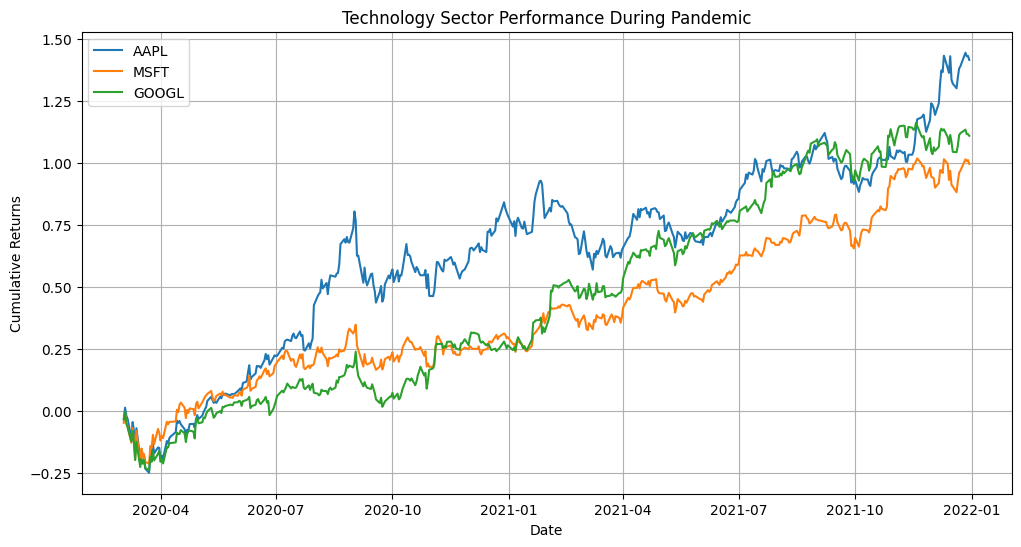


Technology Sector Statistics:
Mean Return:
  AAPL: 0.5496
  MSFT: 0.4353
  GOOGL: 0.4593
Volatility:
  AAPL: 0.3723
  MSFT: 0.3433
  GOOGL: 0.3249
Max Drawdown:
  AAPL: -0.2589
  MSFT: -0.2163
  GOOGL: -0.2396

Analyzing Healthcare Sector...


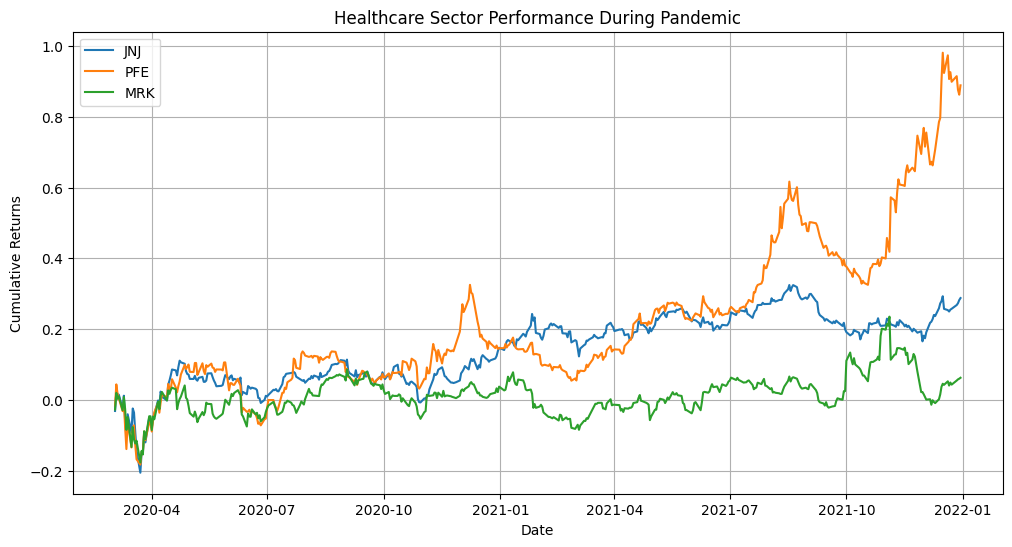


Healthcare Sector Statistics:
Mean Return:
  JNJ: 0.1666
  PFE: 0.3966
  MRK: 0.0727
Volatility:
  JNJ: 0.2412
  PFE: 0.3178
  MRK: 0.2820
Max Drawdown:
  JNJ: -0.2254
  PFE: -0.2173
  MRK: -0.2017

Analyzing Energy Sector...


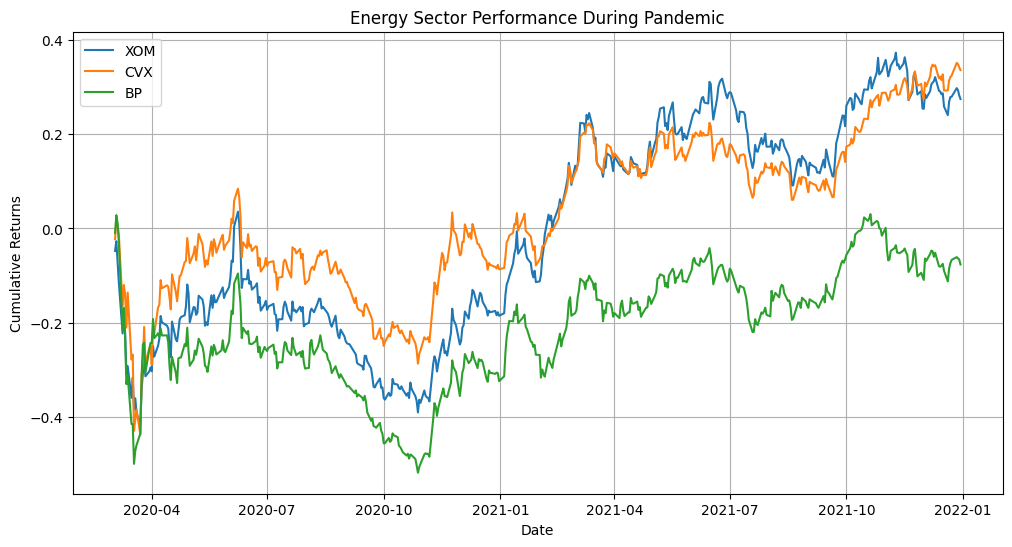


Energy Sector Statistics:
Mean Return:
  XOM: 0.2269
  CVX: 0.2740
  BP: 0.0864
Volatility:
  XOM: 0.4356
  CVX: 0.4793
  BP: 0.5086
Max Drawdown:
  XOM: -0.4163
  CVX: -0.4497
  BP: -0.5322

Analyzing Consumer Sector...


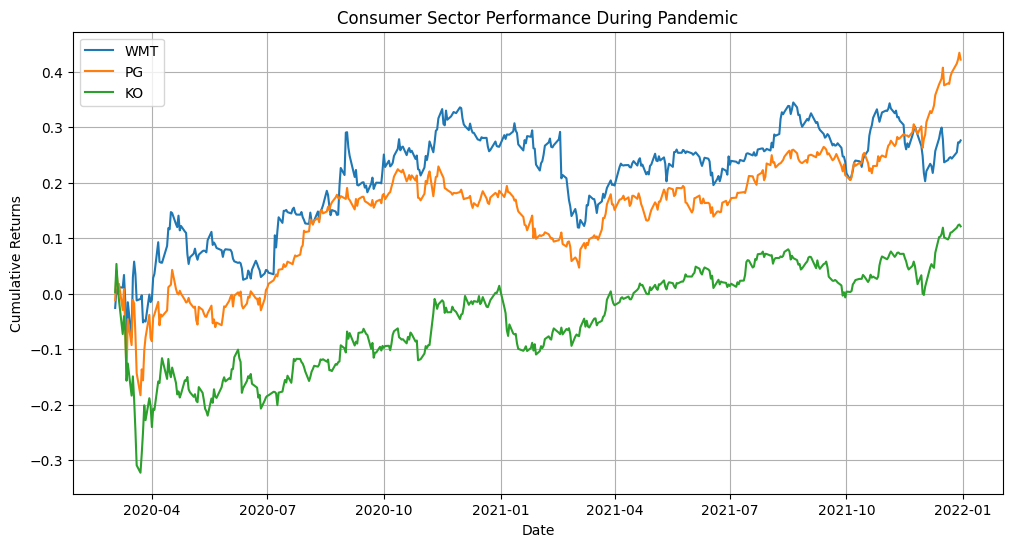


Consumer Sector Statistics:
Mean Return:
  WMT: 0.1642
  PG: 0.2233
  KO: 0.0994
Volatility:
  WMT: 0.2521
  PG: 0.2526
  KO: 0.2712
Max Drawdown:
  WMT: -0.1623
  PG: -0.2153
  KO: -0.3569

Analyzing Finance Sector...


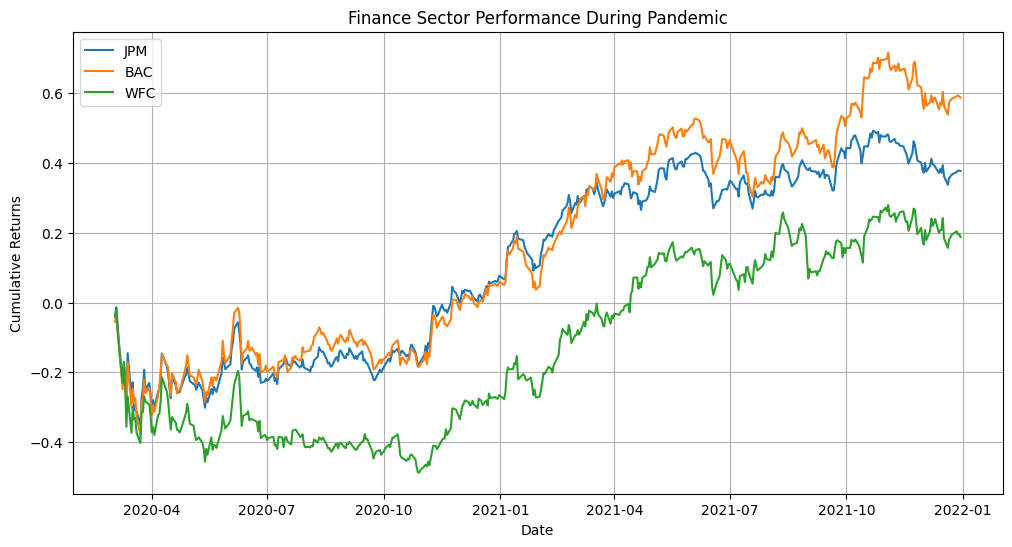


Finance Sector Statistics:
Mean Return:
  JPM: 0.2629
  BAC: 0.3583
  WFC: 0.2236
Volatility:
  JPM: 0.4229
  BAC: 0.4638
  WFC: 0.5099
Max Drawdown:
  JPM: -0.3497
  BAC: -0.3805
  WFC: -0.4875

Sector Comparison Summary:
                                                  Mean Return  \
Technology  AAPL     0.549623
MSFT     0.435311
GOOGL    0...   
Healthcare  JNJ    0.166619
PFE    0.396634
MRK    0.07269...   
Energy      XOM    0.226865
CVX    0.274041
BP     0.08636...   
Consumer    WMT    0.164176
PG     0.223281
KO     0.09935...   
Finance     JPM    0.262887
BAC    0.358289
WFC    0.22362...   

                                                   Volatility  \
Technology  AAPL     0.372331
MSFT     0.343321
GOOGL    0...   
Healthcare  JNJ    0.241238
PFE    0.317828
MRK    0.28196...   
Energy      XOM    0.435597
CVX    0.479308
BP     0.50863...   
Consumer    WMT    0.252135
PG     0.252574
KO     0.27119...   
Finance     JPM    0.422851
BAC    0.463758
WFC    0.50990..

In [16]:
if __name__ == "__main__":
    # Install required packages if needed
    try:
        import yfinance
    except ImportError:
        print("Installing required packages...")
        !pip install yfinance pandas matplotlib
        
    main()